# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

---
Описание данных: 
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- ...
    
    
---

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

Прочитаем файл и посмотрим общую информацию.

In [0]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Было обнаружено, что в исходном файле разделитель не запятая, а знак табуляции. Также в 13 колонках есть пропущенные значения, а в колонках *last_price*, *first_day_exposition*, *floors_total*, *balcony*, *parks_around3000*, *ponds_around3000*, *days_exposition* следует изменить тип данных для удобства.


### Шаг 2. Предобработка данных

In [0]:
df['balcony'].isna().sum()

11519

Логично, предположить, что т.к. число балконов - это данные вводимые пользователем, то пропущенное значение говорит о том, что балкона в квартире нет. Можно заменить нулями.

In [0]:
df['balcony'] = df['balcony'].fillna(0)

In [0]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Оказывается, есть приличная доля квартир, которые не относятся ни к одному из трех указанных типов:

In [0]:
df.query('studio==False and open_plan==False and is_apartment==False')['total_images'].count()

2703

In [0]:
df.query('studio==False and open_plan==False and is_apartment.isna()')['total_images'].count() #число не студий и не open plan

20730

Раз пользователь не указал, что его квартира является апартаментами, логично предположить, что не является, т.к. в столбцах *studio* и *open_plan* пропусков нет. Заменим пропуски на False.

In [0]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Поищем дубликаты:

In [0]:
df.duplicated().sum()

0

Приведем *first_day_exposition* к типу данным datetime в формате "год-месяц-день", чтобы в дальнейшем было удобнее извлекать отдельные значения (месяц, год и т.п.). Отсечём время даты публикации, т.к. эти излишние подробности для нас нерелевантны.

In [0]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['first_day_exposition'].head() #проверка

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Колонку *balcony* приведем к целочисленному типу, т.к. эти значения дробными не могут быть. В других колонках не будем менять тип float на int, где это целесообразно, так как мы все равно будем часто обращаться к средним значениям этих величин, а они в любом случае будут дробными.

In [0]:
df['balcony'] = df['balcony'].astype('int')
print(df.query('is_apartment == True and studio==True'))
print(df.query('is_apartment == True and open_plan==True'))
print(df.query('studio == True and open_plan==True'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_aro

Видим, что квартира может принадлежать только какому-то одному типу: студия, апартаменты, свободная планировка и другое (то, что не входит ни в одну из этих трех категорий).

In [0]:
df.query('studio==True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,...,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,False,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,False,...,NaN,0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,False,...,NaN,0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,False,...,NaN,0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Так как в студиях нет разделений на комнаты, то во всех строках со студиями в колонках с площадью кухни стоят пропуски. Площадь студии можно представить как сумму жилой площади, площади балконов (если они есть) и площади ванной комнаты. Поэтому пропуски в кухнях для студий можно заменить нулями.

In [0]:
df.loc[df['studio']==True, 'kitchen_area'] = 0

Посмотрим информацию о высоте потолков:

In [0]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

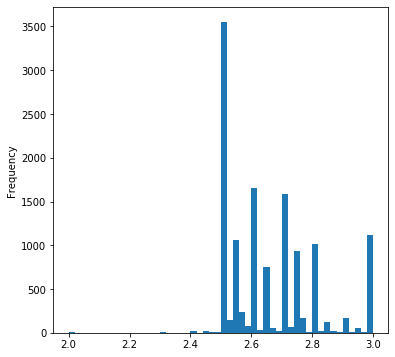

In [0]:
df['ceiling_height'].plot(kind='hist', bins=50, figsize=(6,6), range=(2,3))
plt.show()

Пропуски в колонках с расстояниями до ближайшего аэропорта, расстояниями до центра и высотой потолков заменим медианным значениям для каждого конкретного населенного пункта, а также заменим везде "поселок" на "посёлок", избежав таким образом неявных дубликатов названий городов.

In [0]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')

In [0]:
for item in df.groupby('locality_name'):
    city_name = item[0]
    median_dist_aero = item[1]['airports_nearest'].median()
    median_ceiling_height = item[1]['ceiling_height'].median()
    median_dist_center = item[1]['cityCenters_nearest'].median()
    df.loc[(df['airports_nearest'].isna()) & (df['locality_name'] == city_name), 'airports_nearest'] = median_dist_aero
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == city_name), 'ceiling_height'] = median_ceiling_height
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == city_name), 'cityCenters_nearest'] = median_dist_center
df.info()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23558 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21570 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18827 non-null float64
cityCenters_nearest     18827 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

Посмотрим на характеристики столбца с высотой потолков после замены:

In [0]:
df['ceiling_height'].describe()

count    23558.000000
mean         2.732502
std          1.004616
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

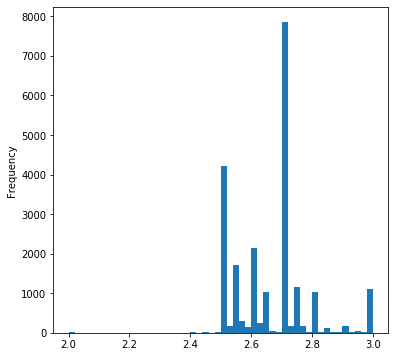

In [0]:
df['ceiling_height'].plot(kind='hist', bins=50, figsize=(6,6), range=(2,3))
plt.show()

Медианное значение изменилось на 5 см, визуально гистограммы одинаковы: будем считать замену в высоте потолков удачной.

### Вывод

В результате предобработки:

- были заполнены пропуски в *balcony*, *is_apartment*, *ceiling_height* и частично в *kitchen_area*, *cityCenters_nearest*, *airports_nearest*,
- явных дубликатов не обнаружен, обнаружены неявные дубликаты в названиях населённых пунктов и произведена необходимая замена ("поселок"-"посёлок"),
- пропуски в площадях кухни и жилой площади будут заполнены в следующей части работы после того, как будут посчитаны и добавлены в таблицу необходимые коэффициенты,
- пропуски в остальных колонках оставлены без измений, так как в этих случаях уже либо нельзя заменить пропуски какими-либо значениями без ущерба для достоверности (к примеру, название населенного пункта), либо эти колонки менее важны, либо вообще не используются для анализа (количество парков и прудов в радиусе 3000м, площадь кухни и т.п.). 

### Шаг 3. Посчитайте и добавьте в таблицу

Цена квадратного метра:

In [0]:
df['meter_price'] = round(df['last_price'] / df['total_area'])
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921.0
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72491.0
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44092.0
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.0


День недели, месяц, год

In [0]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Добавим классификацию этажей:

In [0]:
def assign_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# пропущенным значениям из floors_total будет отвечать значение "другой" из колонки floor_category, однако это не должно 
# повлиять на результат, т.к. этих пропущенных значений всего 86
df['floor_category'] = df.apply(assign_floor, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой


Соотношение жилой и общей площади:

In [0]:
df['living_over_total'] = (df['living_area'] / df['total_area'])  # округлим до 2 знаков после запятой

Соотношение площади кухни и общей площади:

In [0]:
df['kitchen_over_total'] = (df['kitchen_area'] / df['total_area']) # округлим до 2 знаков после запятой
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_over_total,kitchen_over_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.0,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.6,1,False,...,0.0,NaN,81.0,82921.0,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.3,4,False,...,2.0,574.0,558.0,92786.0,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,False,...,3.0,234.0,424.0,408176.0,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,NaN,72491.0,1,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.0,4,False,...,NaN,NaN,45.0,52542.0,0,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,44092.0,6,2,2018,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602.0,149511.0,1,3,2017,другой,NaN,0.303583


Теперь, зная доли жилой и кухонной площади, можно на основании этой информации заполнить пропуски в соответствующих колонках. Между числом комнат и жилой площадью и площадью кухни, безусловно, есть корреляция, покажем это:

In [0]:
df[['rooms', 'living_area', 'kitchen_area']].corr()

,rooms,living_area,kitchen_area
rooms,1.000000,0.845977,0.286652
living_area,0.845977,1.000000,0.431663
kitchen_area,0.286652,0.431663,1.000000


Корреляция числа комнат с площадью кухни меньше, т.к. при увеличении общей площади (то есть числа комнат), есть какое-то разумное предельное значение для площади кухни. Поэтому ожидается, что с увеличением числа комнат (общей площади), доля жилой площади будет немного расти, а доля площади кухни немного уменьшаться. Проверим:

In [0]:
df[['rooms', 'living_over_total', 'kitchen_over_total']].corr()

,rooms,living_over_total,kitchen_over_total
rooms,1.000000,0.481393,-0.537580
living_over_total,0.481393,1.000000,-0.718764
kitchen_over_total,-0.537580,-0.718764,1.000000


На этом основании можно сначала посчитать пропущенные значения в долях жилой площади и площади кухни, группируя по числу комнат. А потом, зная общую площадь, пересчитать абсолютные значения жилой площади и кухни в колонках, где есть пропуски.

In [0]:
for item in df.groupby('rooms'):
    number_of_rooms = item[0]
    living_ratio_median = item[1]['living_over_total'].median() # медианная доля жилой площади для number_of_rooms комнат
    kitchen_ratio_median = item[1]['kitchen_over_total'].median() # медианная доля площади кухни для number_of_rooms комнат
    df.loc[(df['living_over_total'].isna()) & (df['rooms'] == number_of_rooms ), 'living_over_total'] = living_ratio_median
    df.loc[(df['kitchen_over_total'].isna()) & (df['rooms'] == number_of_rooms ), 'kitchen_over_total'] = kitchen_ratio_median

In [0]:
df[['living_area', 'kitchen_area']].describe()

,living_area,kitchen_area
count,21796.000000,21570.000000
mean,34.457852,10.496794
std,22.030445,5.949767
min,2.000000,0.000000
25%,18.600000,7.000000
50%,30.000000,9.010000
75%,42.300000,12.000000
max,409.700000,112.000000


In [0]:
df.loc[df['living_area'].isna(), 'living_area'] = df['total_area'] * df['living_over_total']
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area'] * df['kitchen_over_total']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23558 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18827 non-null float64
cityCenters_nearest     18827 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

In [0]:
df[['living_area', 'kitchen_area']].describe()

,living_area,kitchen_area
count,23699.000000,23699.000000
mean,34.693060,10.399212
std,22.836079,5.860797
min,2.000000,0.000000
25%,18.700000,7.000000
50%,30.000000,9.000000
75%,42.400000,11.780000
max,430.133948,122.398591


После заполнения пропусков основные хар-ки распределений не изменились.

### Вывод

На данном этапе:

- были посчитаны и добавлены в таблицу новые величины (цена квадратного метра, день недели, месяц и год публикации объявления, соотношение жилой и общей площади, а также отношение площади кухни к общей),
- была проведена категоризация квартир относительно этажа на 3 категории (первый, последний, другой),
- были рассчитаны пропуски в площади кухни и жилой площади на основании медианных долей жилой и кухонной площадей, сгруппированных по кол-ву комнат.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Построение гистограмм и диаграммы размаха автоматизируем собственной функцией.

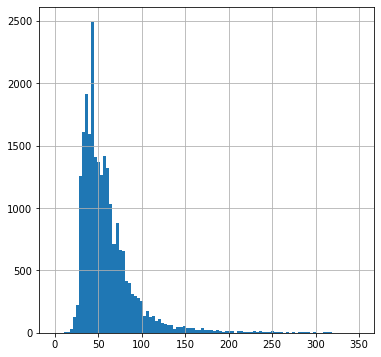

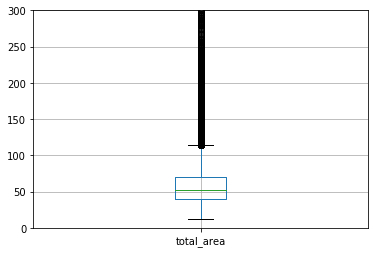

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
90%         93.520000
95%        116.000000
max        900.000000
Name: total_area, dtype: float64


In [0]:
# параметры функции learn_about
# data - таблица
# bins - число корзин в гистограмме
# xlim_hist - предел по х в гистограмме
# ylim_box - предел по у в диаграмме размаха
# column - необходимая колонка

def learn_about(data, bins, xlim_hist, ylim_box, column): # выводим гистограмму, диаграмму размаха и результат работы describe()
    hist = data[column].hist(bins=bins, range=(0, xlim_hist), figsize=(6,6))
    plt.show()
    box = data[[column]].boxplot()
    plt.ylim(0, ylim_box)
    plt.show()
    describe = data[column].describe(percentiles=[0.25, 0.9, 0.95, 0.75])
    print(describe)
    return describe['95%']
    
total_area_95 = learn_about(df, 100, 350, 300, 'total_area')


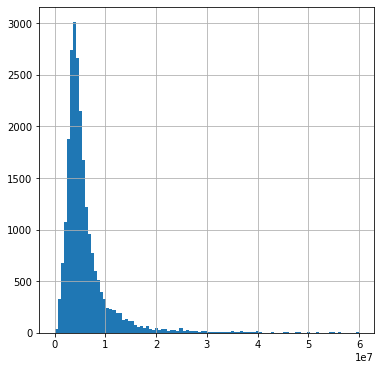

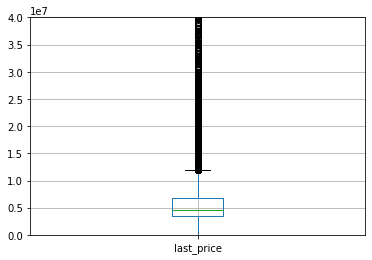

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
90%      1.091423e+07
95%      1.530000e+07
max      7.630000e+08
Name: last_price, dtype: float64


In [0]:
last_price_95 = learn_about(df, 100, 6e7, 4e7, 'last_price')

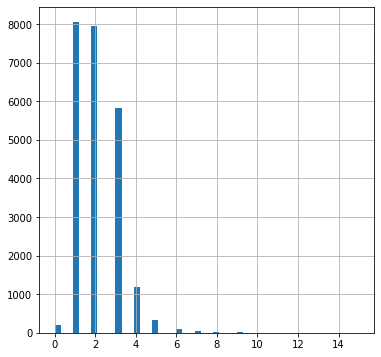

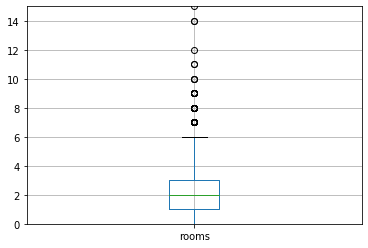

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          3.000000
95%          4.000000
max         19.000000
Name: rooms, dtype: float64


In [0]:
rooms_95 = learn_about(df, 50, 15, 15, 'rooms')

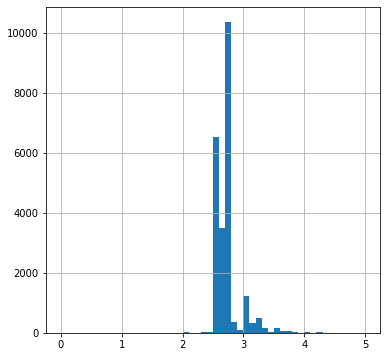

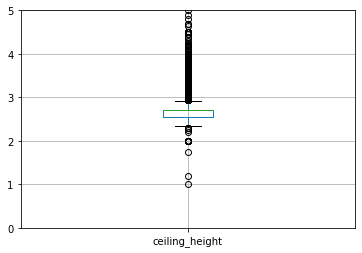

count    23558.000000
mean         2.732502
std          1.004616
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
90%          3.000000
95%          3.150000
max        100.000000
Name: ceiling_height, dtype: float64


In [0]:
ceiling_height_95 = learn_about(df, 50, 5, 5, 'ceiling_height')

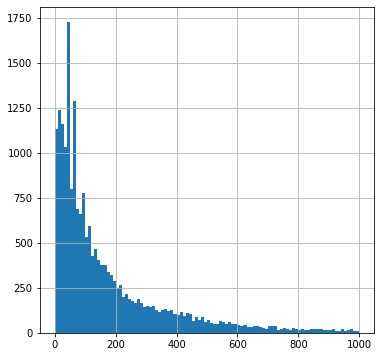

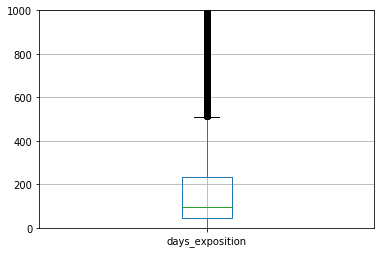

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
90%        460.000000
95%        647.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [0]:
days_exposition_95 = learn_about(df, 100, 1000, 1000, 'days_exposition')

In [0]:
df.query('days_exposition > 730')['last_price'].mean()

8868128.817576565

Интересное и вполне логичное наблюдение: средняя цена медленных продаж гораздо выше общего среднего.

In [0]:
len(df.query('days_exposition > 730')) / len(df)

0.03168910080594118

Среднее почти в 2 раза больше медианы. При этом 3% квартир продавались уж очень долго, больше двух лет. Эти значения-то и подняли среднее так сильно. Обычно продажа занимает 3 месяца. Быстрой можно считать продажу, совершенную приблизительно за месяц. Необычно долгой объявим продажу, которая произошла через два года и более со дня создания объявления: эти значения будут выбросами,их мы исключим из анализа.

In [0]:
df.query('ceiling_height ==1') # всего одна такая квартира - похоже на ошибку заполнения анкеты человеком

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_over_total,kitchen_over_total
22590,16,6000000.0,55.0,2018-10-31,2,1.0,12.0,32.4,7,False,...,2.0,289.0,13.0,109091.0,2,10,2018,другой,0.589091,0.181818


In [0]:
df.query('rooms==19') # cудя по большой площади, похоже на реальное значение

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_over_total,kitchen_over_total
14498,6,32250000.0,374.6,2018-06-09,19,2.7,5.0,264.5,2,False,...,2.0,548.0,114.0,86092.0,5,6,2018,другой,0.706086,0.073679


Кроме колонки с числом комнат 95-й перцентиль почти совпадает со минимальным значениям выбросов, которое выдает диаграмма размаха. Поэтому для этих колонок будет считать выбросами все, что больше 95-го перцентиля, а минимальное значение выброса для числа комнат установим = 6 как на диаграмме размаха.

In [0]:
new_df = df.query('days_exposition < @days_exposition_95 and rooms < 6 and last_price < @last_price_95 and ceiling_height < @ceiling_height_95')
new_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_over_total,kitchen_over_total
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,0.0,NaN,81.0,82921.0,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,2.0,574.0,558.0,92786.0,3,8,2015,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.0,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,NaN,NaN,55.0,95066.0,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,0.0,NaN,155.0,99196.0,3,11,2017,другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,1.0,806.0,519.0,129904.0,3,10,2016,другой,0.552812,0.145405
23692,2,1350000.0,30.00,2017-07-07,1,2.60,5.0,17.500000,4,False,...,NaN,NaN,413.0,45000.0,4,7,2017,другой,0.583333,0.200000
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.000000,8,False,...,1.0,675.0,239.0,73718.0,4,8,2016,другой,0.641026,0.128205
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.000000,4,False,...,NaN,NaN,45.0,52542.0,0,1,2018,другой,0.644068,0.144068


In [0]:
print('Всего было удалено {:.0%} строк'.format(1 - len(new_df) / len(df)))

Всего было удалено 24% строк


In [0]:
df.query('days_exposition == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_over_total,kitchen_over_total
1632,19,4000000.0,49.9,2019-05-01,2,2.5,9.0,25.0,1,False,...,1.0,681.0,1.0,80160.0,2,5,2019,первый,0.501002,0.200401


Вероятно, объявление было дано по ошибке, либо с неправильными данными, поэтому его так быстро сняли. Однако эта "единица" никак не влияет на среднее число дней на продаже, поэтому нет смысла убирать эту строку.

В результате анализа кроме выбросов были обнаружены явно ошибочные значения, например, 1- и 100-метровые потолки.

Автоматизируем построение столбчатых диаграмм, введением пользовательской функции:

In [0]:
def plot_mybar(data, index, values):
    (data
     .pivot_table(index=index, values=values, aggfunc='median')
     .sort_values(by=values)
     .plot(kind='bar', y=values, figsize=(6,6))
    )

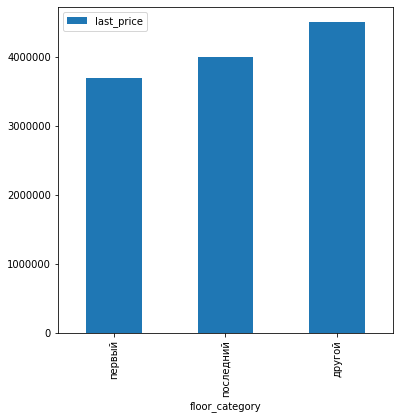

In [0]:
plot_mybar(new_df, 'floor_category', 'last_price')

Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом:

In [0]:
new_df.pivot_table(index='floor_category', values='last_price', aggfunc='count').rename(columns={'last_price':'counts'})

,counts
floor_category,
другой,13433
первый,2184
последний,2373


Вполне ожидаемый результат: самые желанные и дорогие квартиры не на первых и не на последних этажах. Посмотрим в отдельности на коэффициенты корреляции между некоторыми парами величин:

In [0]:
new_df['rooms'].corr(new_df['last_price'])

0.4726650656070476

In [0]:
new_df['ceiling_height'].corr(new_df['last_price'])

0.4036091037056529

In [0]:
new_df['total_area'].corr(new_df['last_price']) # cамая большая корреляция, естественно, у цены с площадью

0.7381980847500919

In [0]:
new_df['cityCenters_nearest'].corr(new_df['last_price'])

-0.34071220580548445

In [0]:
new_df['airports_nearest'].corr(new_df['last_price']) # а вот от дальности до аэропорта цена не зависит совсем

-0.06804194249121817

In [0]:
new_df['parks_around3000'].corr(new_df['last_price'])

0.11440708870154595

In [0]:
new_df['ponds_around3000'].corr(new_df['last_price'])

0.14820961262181995

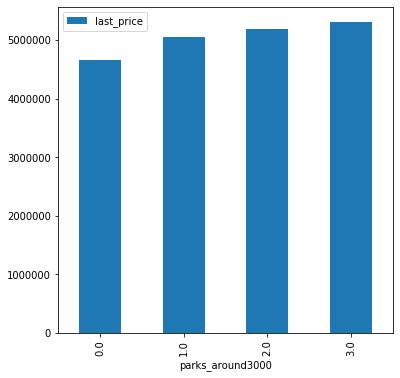

In [0]:
plot_mybar(new_df, 'parks_around3000', 'last_price')

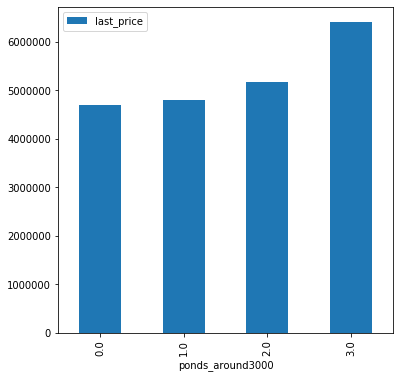

In [0]:
plot_mybar(new_df, 'ponds_around3000', 'last_price')

Наличие парков и прудов неподалеку от дома так же влияет на стоимость квартиры, однако в гораздо меньшей степени, чем число комнат, этаж, общая площадь, высота потолков и расстояние до центра.

In [0]:
def plot_myline(data, index, values):
    (data
     .pivot_table(index=index, values=values)
     .plot(style='-', y=values, figsize=(6,6))
    )   

Зависимость цены от того, в какой день было размещено объявление о продаже квартиры:

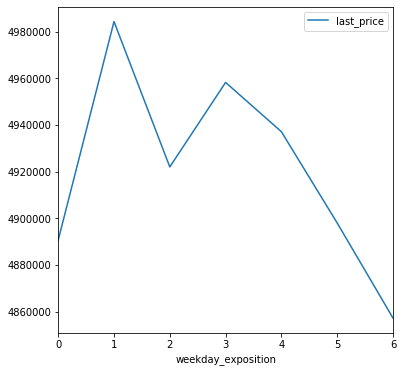

In [0]:
plot_myline(new_df, 'weekday_exposition','last_price')

Зависимость цены от того, в какой месяц было размещено объявление о продаже квартиры:

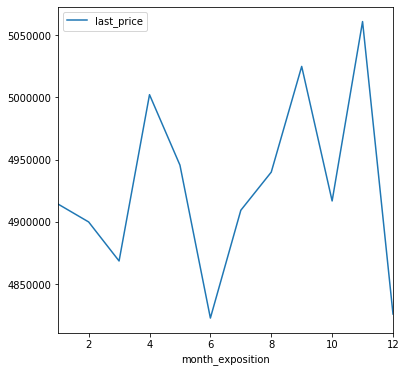

In [0]:
plot_myline(new_df, 'month_exposition','last_price')

Из графиков хорошо видно, что никакой зависимости цены от дня или месяца размещения квартиры нет: цены, усредненные по дню (месяцу), флуктуируют на 5-7% от дня к дню (месяца к месяцу).

Зависимость цены от того, в какой год было размещено объявление о продаже квартиры:

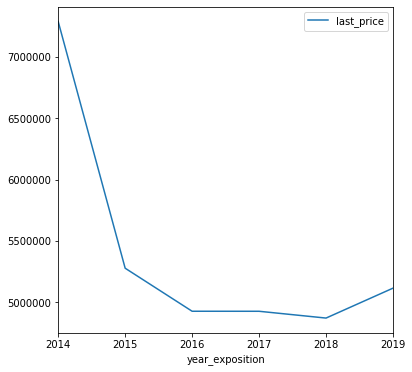

In [0]:
plot_myline(new_df, 'year_exposition','last_price')

А здесь просмативается закономерность. После введения санкций в 2014 году люди стали беднеть, цены на недвижимость падать. Однако с 2018 года снова начался рост цен на жилье.

Посмотрим, есть ли зависимость цены от количества комнат и удаленности квартиры от центра. Но сначала сгруппируем на зоны по удаленности:

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


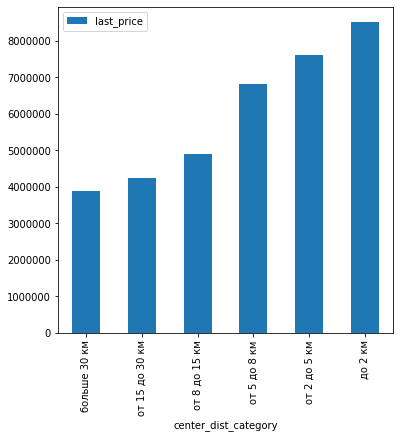

In [0]:
def dist_divide(dist):
    if 0 <= dist < 2000:
        return 'до 2 км'
    elif 2000 <= dist < 5000:
        return 'от 2 до 5 км'
    elif 5000 <= dist < 8000:
        return 'от 5 до 8 км'
    elif 8000 <= dist < 15000:
        return 'от 8 до 15 км'
    elif 15000 <= dist < 30000:
        return 'от 15 до 30 км'
    elif dist >= 30000:
        return 'больше 30 км'

new_df['center_dist_category'] = new_df['cityCenters_nearest'].apply(dist_divide)
plot_mybar(new_df, 'center_dist_category', 'last_price')

Видим, что, чем ближе к центру, тем средняя цена действительно выше.

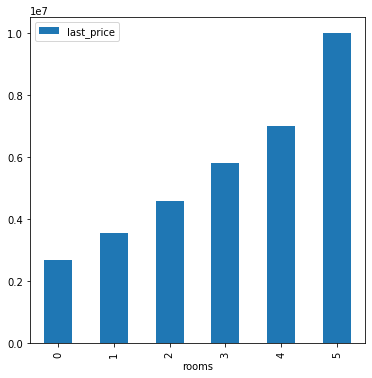

In [0]:
plot_mybar(new_df, 'rooms', 'last_price')

Чем больше комнат (т.е. чем больше общая площадь), тем дороже квартира.

In [0]:
top_10 = (new_df
          .pivot_table(index='locality_name', values='total_images', aggfunc='count')
          .rename(columns={'total_images':'всего объявлений'})
          .sort_values(by='всего объявлений', ascending=False)
          .head(10)
         )

In [0]:
top_10['meter_price_mean'] = (new_df
                              .query('locality_name in @top_10.index')
                              .groupby('locality_name')['meter_price']
                              .mean()
                             )
top_10.sort_values(by='meter_price_mean',ascending=False)

,всего объявлений,meter_price_mean
locality_name,,
Санкт-Петербург,11633,105569.093011
Пушкин,272,100023.845588
деревня Кудрово,278,92670.708633
посёлок Парголово,292,89472.328767
посёлок Мурино,530,85839.726415
посёлок Шушары,393,77942.366412
Колпино,292,74676.660959
Гатчина,250,68063.776000
Всеволожск,320,66764.490625


В Петербурге самая большая цена за метр, а в Выборге самая маленькая. Вполне ожидаемо, что Питер дороже всех.

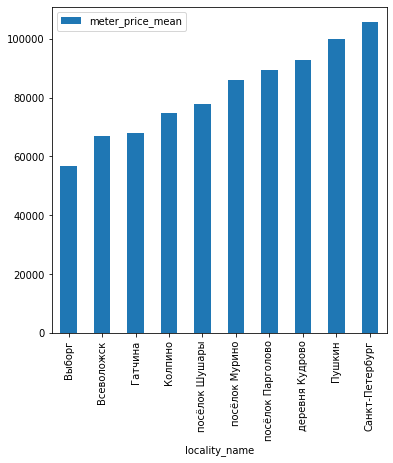

In [0]:
plot_mybar(top_10, 'locality_name', 'meter_price_mean')

Выделим объявления только из Петербурга и подсчитаем некоторые средние:

In [0]:
peter = new_df.query('locality_name == "Санкт-Петербург"')
peter['center_dist_km'] = round(peter['cityCenters_nearest'] / 1000)
for item in peter.groupby('center_dist_km'): # группируем по расстоянию до центра в километрах
    dist_km = item[0] # расстояние до центра
    price_km = item[1]['meter_price'].median() # средняя цена за метр квартиры с данным расстоянием до центра
    counts = len(item[1]['meter_price']) # число объявлений с данным расстоянием до центра
    area_per_km = item[1]['total_area'].median() # средняя общая площадь квартиры с данным расстоянием до центра
    peter.loc[peter['center_dist_km'] == dist_km , 'price_per_km'] = price_km
    peter.loc[peter['center_dist_km'] == dist_km , 'counts'] = counts
    peter.loc[peter['center_dist_km'] == dist_km , 'area_per_km'] = area_per_km
peter[['center_dist_km', 'meter_price', 'price_per_km', 'counts', 'area_per_km']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,center_dist_km,meter_price,price_per_km,counts,area_per_km
2,14.0,92786.0,101034.5,1070.0,46.5
4,8.0,100000.0,115000.0,401.0,56.5
9,15.0,88525.0,100000.0,1302.0,47.0
10,14.0,127525.0,101034.5,1070.0,46.5
15,14.0,119231.0,101034.5,1070.0,46.5
...,...,...,...,...,...
23688,14.0,91089.0,101034.5,1070.0,46.5
23689,16.0,100567.0,96515.0,1061.0,48.0
23690,6.0,105769.0,119571.0,355.0,58.0
23691,4.0,129904.0,111667.0,329.0,66.6


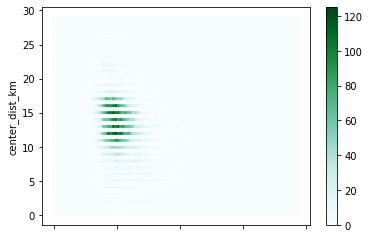

In [0]:

peter.plot(kind='hexbin',y='center_dist_km', x='meter_price')


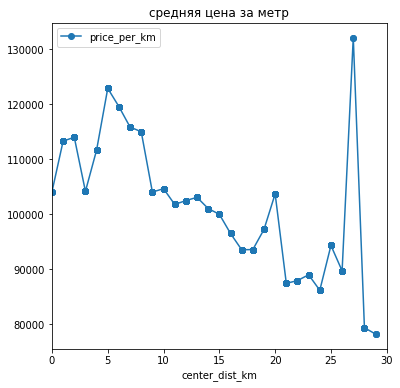

In [0]:
peter.sort_values(by='center_dist_km').plot(style='o-', x='center_dist_km', y='price_per_km', figsize=(6,6), title='средняя цена за метр')
plt.xlim(0, 30)
plt.show()

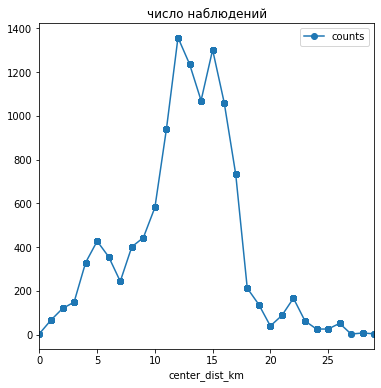

In [0]:
peter.sort_values(by='center_dist_km').plot(style='o-', x='center_dist_km', y='counts', figsize=(6,6), title='число наблюдений')
plt.show()

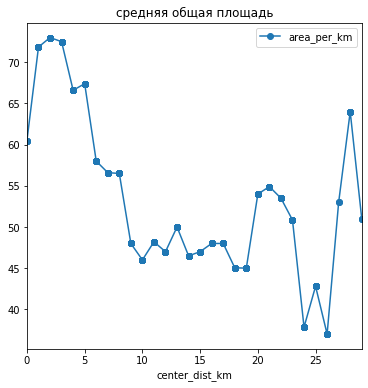

In [0]:
peter.sort_values(by='center_dist_km').plot(style='o-', x='center_dist_km', y='area_per_km', figsize=(6,6), title='средняя общая площадь')
plt.show()

Из графика зависимости цены кв.метра от расстояния до центра видим интенсивный пик на 26-27 км и второй по величине - на 5-8 км от центра. Всплеск на 26-27 км может быть вызван двумя факторами:

- для данных величин очень мало наблюдений в сравнении с другими расстояниями, поэтому медиана цены может флуктуировать очень значительно,
- здесь может сказываться влияние пригорода, где есть новое элитное жилье. Видно, что с расстояния 26 км наблюдается резкий рост общей площади, что сказывается на росте цены за квадратный метр.

Поэтому центром будет считать область другого пика, то есть значения от 0 до 8 км включительно.

Выделим центральную область:

In [0]:
peter_center = peter.query('center_dist_km <= 8')

Изучим параметры площадь, цена, число комнат, высота потолков для квартир в центральной зоне.

In [0]:
peter_center_stats = peter_center[['total_area', 'last_price','ceiling_height', 'rooms']].describe()
peter_stats = peter[['total_area', 'last_price','ceiling_height', 'rooms']].describe()
stats_compare = peter_center_stats.join(peter_stats, lsuffix='_center')
stats_compare

,total_area_center,last_price_center,ceiling_height_center,rooms_center,total_area,last_price,ceiling_height,rooms
count,2092.000000,2.092000e+03,2092.000000,2092.000000,11633.000000,1.163300e+04,11633.000000,11633.000000
mean,66.134900,7.690177e+06,2.765636,2.261472,55.000359,5.754079e+06,2.681301,1.953494
std,25.597899,2.923135e+06,0.155035,0.997360,21.106184,2.510058e+06,0.128431,0.919650
min,12.000000,1.600000e+06,2.400000,0.000000,12.000000,1.219000e+04,1.000000,0.000000
25%,46.000000,5.499018e+06,2.700000,2.000000,40.000000,3.990900e+06,2.600000,1.000000
50%,62.500000,7.200000e+06,2.700000,2.000000,50.000000,5.000000e+06,2.700000,2.000000
75%,81.200000,9.500000e+06,2.840000,3.000000,65.600000,6.800000e+06,2.700000,3.000000
max,255.000000,1.520000e+07,3.140000,5.000000,255.000000,1.527600e+07,3.140000,5.000000


Посмотрим на распределение площади, цены, числа комнат и высоты потолков в ценре.

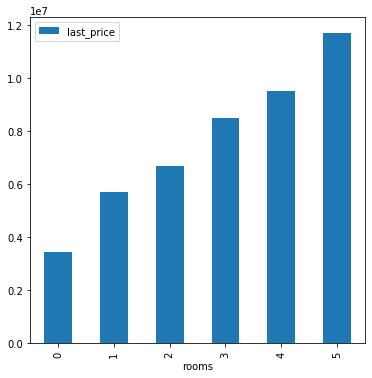

In [0]:
(peter_center
   .pivot_table(index='rooms', values='last_price', aggfunc='median')
   .sort_values(by='last_price')
   .plot(kind='bar', y='last_price', figsize=(6,6))
)
plt.show()

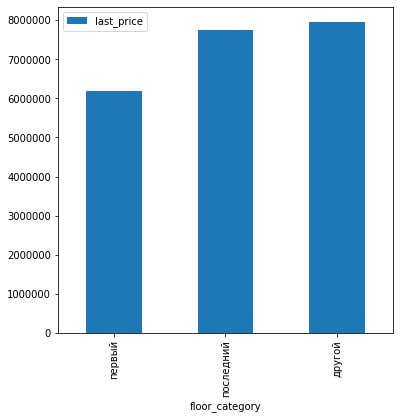

In [0]:
(peter_center.pivot_table(index='floor_category', values='last_price')
   .sort_values(by='last_price')
   .plot(kind='bar', y='last_price', figsize=(6,6))
)
plt.show()

In [0]:
peter_center_floors = peter_center.pivot_table(index='floor_category', values='last_price').rename(columns={'last_price':'price_petersburg_center'})
peter_floors = peter.pivot_table(index='floor_category', values='last_price').rename(columns={'last_price':'price_petersburg'})
floors_compare = peter_center_floors.join(peter_floors)
floors_compare

,price_petersburg_center,price_petersburg
floor_category,,
другой,7.939874e+06,5.856648e+06
первый,6.194369e+06,4.972822e+06
последний,7.750244e+06,5.745986e+06


In [0]:
peter_center_rooms = peter_center.pivot_table(index='rooms', values='last_price').rename(columns={'last_price':'price_petersburg_center'})
peter_rooms = peter.pivot_table(index='rooms', values='last_price').rename(columns={'last_price':'price_petersburg'})
rooms_compare = peter_center_rooms.join(peter_rooms)
rooms_compare

,price_petersburg_center,price_petersburg
rooms,,
0,3.946000e+06,3.344068e+06
1,5.842662e+06,4.291554e+06
2,7.339079e+06,5.952284e+06
3,8.887276e+06,7.275947e+06
4,9.824878e+06,8.149974e+06
5,1.129250e+07,1.049035e+07


Тенденция в росте цены от первого этажа к последнему в центре Петербурга сохранилась, однако средние цены здесь уже значительно выше. Абсолютно то же самое для зависимости от числа комнат, тренд сохранился, но средние цены выше на ~1.5 млн.

Как видно из таблицы в центральной области города средние значения всех параметров из таблицы (общая площадь, высота потолков, число комнат, цена) и их квантили выше, чем те же для всего города.

Для центра Петербурга нет смысла исследовать зависимость цены от месяца и дня публикации объявления, она будет такой же, как и по всей области, а вот на зависимость от года посмотреть интересно:

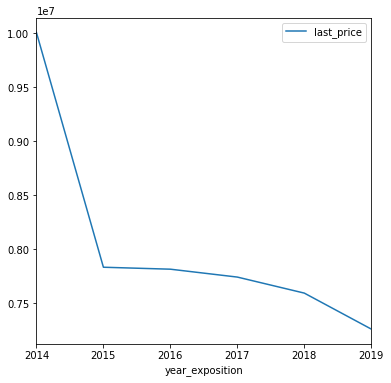

In [0]:
plot_myline(peter_center, 'year_exposition', 'last_price')

Кризис так же обрушил цены на квартиры в центре, однако в отличие от всей области, цены так и продолжают стремительно падать после 2018 года. Однако темпы падения уже не такие быстрые, как до 2015 года. Видимо, нужно больше времени, чтобы дорогие квартиры на Невском и напротив Эрмитажа вернули свою стоимость. Из-за кризиса у людей нет денег на жилье в центре, эти объявления стали менее востребованными.

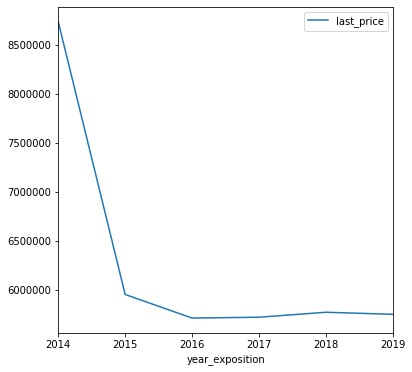

In [0]:
plot_myline(peter, 'year_exposition', 'last_price')

По всему Петербургу ситуация интересная: в 2016 году средние цены вышли на постоянное значение.

### Вывод

На данном этапе:

- были обнаружены и удалены выбросы 
- изучены зависимости цены от этажа, расстояния от центра, числа комнат, даты пубикация объявления
- из 10 населённых пунктов с самым большим числом объявлений, выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра жилья
- выделена центральная зона Петербурга из зависимости цены квартиры от расстояния до центра
- проведено сравнение ключевых показателей, влияющих на ценообразование, на выборке объявлений по всему Петербургу и только по его центру.

### Шаг 5. Общий вывод

В результате выполнения работы было установлено, что:

- обычное время продажи составляет около 3 месяцев. Быстрой можно считать продажу, совершенную менее, чем за месяц, а необычно долгую – более, чем за два года,
- самые дешевые квартиры на первых этажах, далее по возрастанию цены расположились квартиры на последних этажах и потом квартиры на всех остальных,
- самый большой коэффициент корреляции между общей площадью квартиры и ее ценой, что логично. Расстояние до центра, высота потолков и количество комнат влияют на цену примерно в одинаковой, но меньшей по сравнению с общей площадью, степени. Наличие парков и прудов влияет на цену в еще меньшей степени. Средняя цена квартиры без парков рядом  ~4.6 млн, а с 3 парками -  ~5.5 млн. С прудами ситуация немного интереснее: разница между ценами при 0, 1 и 2 прудами небольшая (около 5 млн), а цена квартир с 3 прудами рядом скакнула до ~6.5 млн. Расстояние до аэропорта не влияет на цену,
- от дня и месяца размещения объявления цена не зависит, средние величины флуктуируют, как и должны. А вот зависимость от года есть, причем немного разная для квартир, находящихся в разных местах. По квартирам из всего датасета произошел обвал цен с 2014 по 2018 на 30%, после чего цены снова стали понемногу расти. Для объектов из центра Петербурга цены все так же продолжают падать по состоянию на 2019 год. А если взять квартиры всего Петербурга, то после обвала, начиная с 2016 года, средние цены зафиксировались на одной отметке. Возможно, во время кризиса дорогие квартиры в центре стали менее востребованы, их сложнее продать, цены продолжают падать. Но люди по-прежнему продолжают покупать свое жилье в других районах города и в области, где зафиксирован подъем цен с 2018 года,
- в центральной зоне Петербурга наблюдаются те же зависимости от цены таких параметров как общая площадь, высота потолков, кол-во комнат, что и во всем городе, однако в центре средние цены выше при одинаковых других параметрах.
